### LSE Data Analytics Online Career Accelerator 
# Course 301: Advanced Analytics for Organisational Impact

## Practical activity: Summarising model outputs

**This is the solution to the activity.**

Your client, age 45, wants to retire when their wealth exceeds £500,000. The current salary is £35,000, the cost of living is 6%, the savings rate is 6%, an interest rate of 2%, and they recieve promotions every year at a promotion raise of 6%. Create and test a model that will allow us to calculate how many years until the client's preferred level of savings is reached. 

Will your client be able to retire at age 65? To prepare your findings for presentation, you now need to summarise your results and visualise the change in wealth over time for the client. 

Create and test a model that will allow you to calculate how many years until the client's preferred level of savings is reached. Will 20 years be enough time? 

## 1. Prepare your workstation

In [1]:
# Import the necessary libraries.
import pandas as pd
import random
import matplotlib.pyplot as plt
# Optional
%matplotlib inline

from dataclasses import dataclass
from sensitivity import SensitivityAnalyzer

## 2. Specify the model inputs

In [2]:
# Create a class and instance.
@dataclass
class ModelInputs:
    starting_salary: int = 35000
    promos_every_n_years: int = 1
    cost_of_living_raise: float = 0.06
    promo_raise: float = 0.06
    savings_rate: float = 0.06
    interest_rate: float = 0.02
    desired_cash: int = 500000
        
model_data = ModelInputs()

model_data

ModelInputs(starting_salary=35000, promos_every_n_years=1, cost_of_living_raise=0.06, promo_raise=0.06, savings_rate=0.06, interest_rate=0.02, desired_cash=500000)

## 3. Perform calculations

In [3]:
# Calculate wage at a given year from start of the model based on cost of living, 
# raises, and regular promotion.
def wages_year(data: ModelInputs, year)->float:
    """
    Gets the wage at a given year from the start of the model based 
    on cost of living raises and regular promotions.
    """
    # Every n years we have a promotion, so dividing the years and taking 
    # out the decimals gets the number of promotions.
    num_promos = int(year / data.promos_every_n_years)
    
    # This is the formula above implemented in Python.
    salary_t = data.starting_salary * (1 + data.cost_of_living_raise)\
    ** year * (1 + data.promo_raise) ** num_promos
    return salary_t

for i in range(4):
    year = i + 1
    salary = wages_year(model_data, year)
    print(f"The wage at year {year} is £{salary:,.0f}.")

The wage at year 1 is £39,326.
The wage at year 2 is £44,187.
The wage at year 3 is £49,648.
The wage at year 4 is £55,785.


In [4]:
def cash_saved_during_year(data: ModelInputs, year):
    """
    Calculated the cash saved within a given year, by first 
    calculating the salary at that year then applying the 
    savings rate.
    """
    salary = wages_year(data, year)
    cash_saved = salary * data.savings_rate
    return cash_saved

In [5]:
def wealth_year(data: ModelInputs, year, prior_wealth):
    """
    Calculate the accumulated wealth for a given year, 
    based on previous wealth, the investment rate,
    and cash saved during the year.
    """
    cash_saved = cash_saved_during_year(data, year)
    wealth = prior_wealth * (1 + data.interest_rate) + cash_saved
    return wealth

In [6]:
# Starting with no cash saved.
prior_wealth = 0  
for i in range(4):
    year = i + 1
    wealth = wealth_year(model_data, year, prior_wealth)
    print(f"The wealth at year {year} is £{wealth:,.0f}.")
    
    # Set next year's prior wealth to this year's wealth.
    prior_wealth = wealth

The wealth at year 1 is £2,360.
The wealth at year 2 is £5,058.
The wealth at year 3 is £8,138.
The wealth at year 4 is £11,648.


In [7]:
# Runs the retirement model; collects salary and wealth information year by year
# and stores it in a DataFrame for further analysis.
def get_salaries_wealths_df(data):
    # Start with no cash saved.
    prior_wealth = 0   
    wealth = 0
    # The ‘year’ becomes ‘1’ on the first loop.
    year = 0  
    
    df_data_tups = []
    while wealth < data.desired_cash:
        year = year + 1
        salary = wages_year(data, year)
        wealth = wealth_year(data, year, prior_wealth)

        # Set next year's prior wealth to this year's wealth.
        prior_wealth = wealth 

        # Save the results in a tuple for later building the DataFrame.
        df_data_tups.append((year, salary, wealth))
        
    # Now we have run the while loop, so wealth must be >= desired_cash. 
    # Create the DataFrame.
    df = pd.DataFrame(df_data_tups, columns=['Year', 'Salary', 'Wealth'])
    
    return df

In [8]:
# Save the function results into the DataFrame.
results_df = get_salaries_wealths_df(model_data)

# View the DataFrame.
results_df.head(10)

,Year,Salary,Wealth
0,1,39326.000000,2359.560000
1,2,44186.693600,5057.952816
2,3,49648.168929,8138.002008
3,4,55784.682609,11647.843005
4,5,62679.669379,15641.580028
5,6,70426.876514,20180.024219
6,7,79131.638451,25331.523010
7,8,88912.308964,31172.892008
8,9,99901.870352,37790.462070
9,10,112249.741527,45281.255803


## 4. Create visualisation

<AxesSubplot:xlabel='Year'>

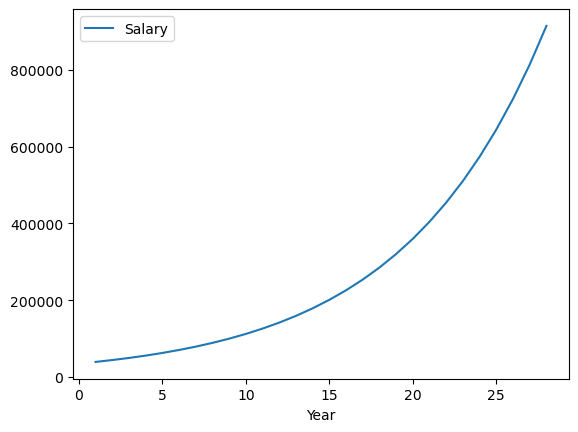

In [9]:
# Visualise wage or salary change over time.
results_df.plot('Year', 'Salary')

<AxesSubplot:xlabel='Year'>

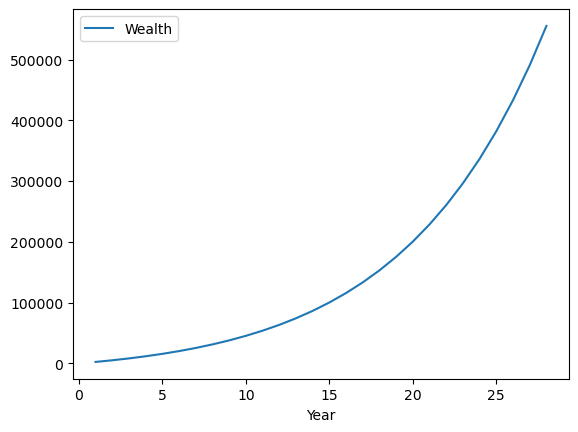

In [10]:
# Visualise wealth change over time.
results_df.plot('Year', 'Wealth')

## Alternative: Years until retirement

In [11]:
def years_to_retirement(data: ModelInputs, print_output=True):
    # Start with no cash saved.
    prior_wealth = 0  
    wealth = 0
    # The ‘year’ becomes ‘1’ on the first loop.
    year = 0  
   
    if print_output:
        print('Wealths over time:')
    while wealth < data.desired_cash:
        year = year + 1
        wealth = wealth_year(data, year, prior_wealth)
        if print_output:
            print(f'The accumulated wealth at year {year} is £{wealth:,.0f}.')
            # Set next year's prior wealth to this year's wealth.
        prior_wealth = wealth  
       
    # Now we have run the while loop, the wealth must be >= desired_cash 
    # (whatever last year was set is the years to retirement), which we can print.
    if print_output:
        # \n makes a blank line in the output.
        print(f'\nRetirement:\nIt will take {year} years to retire.')  
    return year

In [12]:
years = years_to_retirement(model_data)

Wealths over time:
The accumulated wealth at year 1 is £2,360.
The accumulated wealth at year 2 is £5,058.
The accumulated wealth at year 3 is £8,138.
The accumulated wealth at year 4 is £11,648.
The accumulated wealth at year 5 is £15,642.
The accumulated wealth at year 6 is £20,180.
The accumulated wealth at year 7 is £25,332.
The accumulated wealth at year 8 is £31,173.
The accumulated wealth at year 9 is £37,790.
The accumulated wealth at year 10 is £45,281.
The accumulated wealth at year 11 is £53,754.
The accumulated wealth at year 12 is £63,332.
The accumulated wealth at year 13 is £74,153.
The accumulated wealth at year 14 is £86,370.
The accumulated wealth at year 15 is £100,159.
The accumulated wealth at year 16 is £115,714.
The accumulated wealth at year 17 is £133,256.
The accumulated wealth at year 18 is £153,030.
The accumulated wealth at year 19 is £175,314.
The accumulated wealth at year 20 is £200,421.
The accumulated wealth at year 21 is £228,699.
The accumulated weal